# Titanic - Machine Learning from Disasster

Variable    |	Definition                                  |	Key <br>
survival	|   Survival	                                |   0 = No, 1 = Yes <br>
pclass  	|   Ticket class	                            |   1 = 1st, 2 = 2nd, 3 = 3rd <br>
sex         |   Sex                                         |   <br>
Age     	|   Age                                         |   in years <br>	
sibsp   	|   # of siblings / spouses aboard the Titanic	|   <br>
parch	    |   # of parents / children aboard the Titanic	|   <br>
ticket	    |   Ticket number	                            |   <br>
fare	    |   Passenger fare	                            |   <br>
cabin	    |   Cabin number	                            |   <br>
embarked	|   Port of Embarkation	                        |   C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train = pd.read_csv('../Datasets/titanic_data.csv')
train.head(10)

FileNotFoundError: [Errno 2] No such file or directory: '../Datasets/titanic_train.csv'

In [ ]:
test = pd.read_csv('../Datasets/titanic_test.csv')
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
y = train['Survived']
X = train.drop(['Survived'], axis = 1)

In [ ]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [ ]:
print(train.shape)
print(train_X.shape)
print(val_X.shape)

(891, 12)
(712, 11)
(179, 11)


In [ ]:
train_X.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            141
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         2
dtype: int64

<AxesSubplot:>

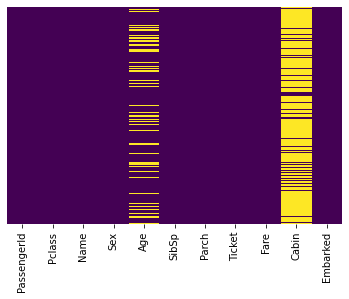

In [ ]:
sns.heatmap(train_X.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

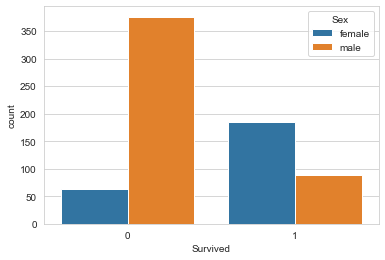

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x=train_y,hue=train_X.Sex)

<AxesSubplot:xlabel='Survived', ylabel='count'>

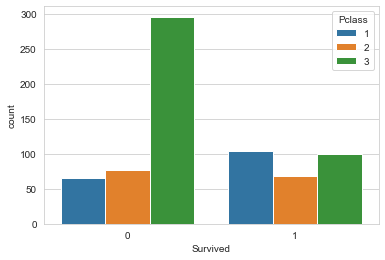

In [ ]:
sns.countplot(x=train_y,hue=train_X.Pclass)

<AxesSubplot:xlabel='Age', ylabel='Count'>

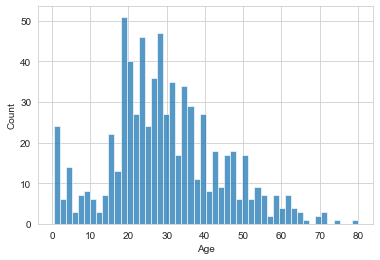

In [ ]:
sns.histplot(train['Age'].dropna(),bins=50)

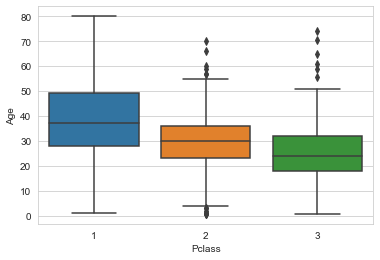

In [ ]:
sns.boxplot(data = train_X, x='Pclass', y='Age')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median', missing_values=np.nan)

num_col = [i for i in train_X.columns if train_X[i].dtype != 'O']
train_X_num = train_X[num_col]

In [ ]:
imputed_data = imputer.fit_transform(train_X_num)  # impute all the missing data
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = train_X_num.columns
train_X[num_col] = df_temp[num_col].values

In [ ]:
train_X.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,141.0,3.0,"Boulos, Mrs. Joseph (Sultana)",female,29.0,0.0,2.0,2678,15.2458,NaN,C
439,440.0,2.0,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0.0,0.0,C.A. 18723,10.5000,NaN,S
817,818.0,2.0,"Mallet, Mr. Albert",male,31.0,1.0,1.0,S.C./PARIS 2079,37.0042,NaN,C
378,379.0,3.0,"Betros, Mr. Tannous",male,20.0,0.0,0.0,2648,4.0125,NaN,C
491,492.0,3.0,"Windelov, Mr. Einar",male,21.0,0.0,0.0,SOTON/OQ 3101317,7.2500,NaN,S
331,332.0,1.0,"Partner, Mr. Austen",male,45.5,0.0,0.0,113043,28.5000,C124,S
588,589.0,3.0,"Gilinski, Mr. Eliezer",male,22.0,0.0,0.0,14973,8.0500,NaN,S
358,359.0,3.0,"McGovern, Miss. Mary",female,29.0,0.0,0.0,330931,7.8792,NaN,Q
674,675.0,2.0,"Watson, Mr. Ennis Hastings",male,29.0,0.0,0.0,239856,0.0000,NaN,S
162,163.0,3.0,"Bengtsson, Mr. John Viktor",male,26.0,0.0,0.0,347068,7.7750,NaN,S


In [ ]:
num_col = [i for i in val_X.columns if val_X[i].dtype != 'O']
val_X_num = val_X[num_col]

In [ ]:
imputed_data = imputer.transform(val_X_num)  # impute all the missing data
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = val_X_num.columns
val_X[num_col] = df_temp[num_col].values

In [ ]:
train_X.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         2
dtype: int64

In [ ]:
val_X.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          138
Embarked         0
dtype: int64

In [ ]:
train_X.Cabin.isnull().sum()/len(train_X)*100

77.10674157303372

In [ ]:
train_X.Cabin.unique()

array([nan, 'C124', 'B71', 'B30', 'A26', 'B57 B59 B63 B66', 'G6', 'B69',
       'E68', 'E121', 'C68', 'B94', 'E17', 'D33', 'D26', 'B58 B60',
       'C128', 'D17', 'A14', 'F33', 'B19', 'D21', 'C148', 'C30', 'D56',
       'E24', 'E40', 'E31', 'E44', 'E38', 'D37', 'E8', 'C92', 'E63',
       'C125', 'F4', 'E67', 'C126', 'B73', 'E36', 'C78', 'E46', 'C111',
       'E101', 'D15', 'E12', 'A32', 'B4', 'A10', 'A5', 'C95', 'E25',
       'C90', 'D6', 'A36', 'D', 'D50', 'B96 B98', 'C93', 'E77', 'C101',
       'D11', 'C123', 'C32', 'B35', 'C91', 'T', 'B101', 'E58', 'A23',
       'B77', 'D28', 'B82 B84', 'B79', 'C45', 'C2', 'B5', 'C104', 'B20',
       'A19', 'B51 B53 B55', 'B80', 'B38', 'B22', 'B18', 'C22 C26', 'A16',
       'F2', 'D47', 'C23 C25 C27', 'B28', 'E10', 'D36', 'C46', 'B39',
       'D30', 'E33', 'C50', 'D20', 'A34', 'C110', 'D19', 'B86', 'D35',
       'C99', 'D46', 'F38', 'A24', 'D7', 'C65', 'C103', 'A31', 'C82',
       'F G63', 'A6', 'E50', 'C52', 'B3', 'B49', 'C118', 'C70', 'F E69',
   

In [ ]:
# Filling missing data in Cabin columns 
# bar#4869switch@^1011

all_datasets = [train_X,val_X,test]

for dataset in all_datasets:
    dataset.Cabin = dataset.Cabin.fillna('Missing')

In [ ]:
train_X.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,141.0,3.0,"Boulos, Mrs. Joseph (Sultana)",female,29.0,0.0,2.0,2678,15.2458,Missing,C
439,440.0,2.0,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0.0,0.0,C.A. 18723,10.5000,Missing,S
817,818.0,2.0,"Mallet, Mr. Albert",male,31.0,1.0,1.0,S.C./PARIS 2079,37.0042,Missing,C
378,379.0,3.0,"Betros, Mr. Tannous",male,20.0,0.0,0.0,2648,4.0125,Missing,C
491,492.0,3.0,"Windelov, Mr. Einar",male,21.0,0.0,0.0,SOTON/OQ 3101317,7.2500,Missing,S
331,332.0,1.0,"Partner, Mr. Austen",male,45.5,0.0,0.0,113043,28.5000,C124,S
588,589.0,3.0,"Gilinski, Mr. Eliezer",male,22.0,0.0,0.0,14973,8.0500,Missing,S
358,359.0,3.0,"McGovern, Miss. Mary",female,29.0,0.0,0.0,330931,7.8792,Missing,Q
674,675.0,2.0,"Watson, Mr. Ennis Hastings",male,29.0,0.0,0.0,239856,0.0000,Missing,S
162,163.0,3.0,"Bengtsson, Mr. John Viktor",male,26.0,0.0,0.0,347068,7.7750,Missing,S


In [ ]:
Cabin_list = list(train_X.Cabin.unique())
Cabin_list.remove('Missing')

In [ ]:
train_X = train_X.replace(Cabin_list,'Available')
val_X = val_X.replace(Cabin_list,'Available')
test = test.replace(Cabin_list,'Available')

In [ ]:
train_X.Cabin.unique()

array(['Missing', 'Available'], dtype=object)

In [ ]:
# Dropping unique identifiers as they don't contribute to the learning algorithms
# Dropping PassengerID and Ticket

train_X = train_X.drop(['PassengerId','Ticket'], axis=1)
val_X =val_X.drop(['PassengerId','Ticket'], axis=1)
test = test.drop(['PassengerId','Ticket'], axis=1)

In [ ]:
train_X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
140,3.0,"Boulos, Mrs. Joseph (Sultana)",female,29.0,0.0,2.0,15.2458,Missing,C
439,2.0,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0.0,0.0,10.5000,Missing,S
817,2.0,"Mallet, Mr. Albert",male,31.0,1.0,1.0,37.0042,Missing,C
378,3.0,"Betros, Mr. Tannous",male,20.0,0.0,0.0,4.0125,Missing,C
491,3.0,"Windelov, Mr. Einar",male,21.0,0.0,0.0,7.2500,Missing,S


In [ ]:
def extract_title(person_name):
    b_index = person_name.find(',')
    e_index = person_name.find('.')
    return person_name[b_index+2:e_index]

train_X['Title'] = train_X['Name'].apply(extract_title)
val_X['Title'] = val_X['Name'].apply(extract_title)
test['Title'] = test['Name'].apply(extract_title)

In [ ]:
train_X.Title.value_counts()

Mr              419
Miss            145
Mrs              96
Master           35
Rev               3
Dr                3
Mlle              2
Major             2
Col               1
Ms                1
Mme               1
the Countess      1
Lady              1
Capt              1
Sir               1
Name: Title, dtype: int64

In [ ]:
train_X = train_X.replace('Ms','Miss')

In [ ]:
acceptable_title = ['Mr', 'Miss', 'Master', 'Mrs']

In [34]:
train_X_1 = train_X.copy()

In [35]:
unique_title_list = [title for title in list(train_X_1.Title.unique()) if title not in acceptable_title]

In [36]:
unique_title_list

['Col',
 'Rev',
 'Dr',
 'Mlle',
 'Mme',
 'the Countess',
 'Major',
 'Lady',
 'Capt',
 'Sir']